# ElasticSearch

* Literature: <https://www.elastic.co/guide/en/elasticsearch/guide/current/index.html>
* In this notebook we follow the steps in this guide
* Java JDK 8 is strongly recommended, so you may need to upgrade your Java
    (on my mac with java 1.6 elasticsearch did not work)

In [5]:
! java -version

java version "1.8.0_191"
Java(TM) SE Runtime Environment (build 1.8.0_191-b12)
Java HotSpot(TM) Server VM (build 25.191-b12, mixed mode)


In [6]:
# download elastic search
# https://www.elastic.co/guide/en/elasticsearch/guide/current/_installing_elasticsearch.html

! curl -L -O https://download.elastic.co/elasticsearch/elasticsearch/elasticsearch-1.7.1.zip
! unzip    elasticsearch-1.7.1.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 30.3M  100 30.3M    0     0  1926k      0  0:00:16  0:00:16 --:--:-- 2055k
Archive:  elasticsearch-1.7.1.zip
replace elasticsearch-1.7.1/config/elasticsearch.yml? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [7]:
! rm elasticsearch-1.7.1.zip
% cd elasticsearch-1.7.1
!ls -l

/home/student/Documents/Zoekmachines/elasticsearch-1.7.1
total 8024
drwxr-xr-x 2 student student    4096 Jul 29  2015 bin
drwxr-xr-x 2 student student    4096 Jul 29  2015 config
drwxrwxr-x 3 student student    4096 Oct 25 12:28 data
-rw-rw-r-- 1 student student 6781468 Oct 28 23:57 elasticsearch.ipynb
drwxrwxr-x 5 student student 1380352 Oct 26 13:35 KVR
drwxr-xr-x 3 student student    4096 Jul 29  2015 lib
-rw-rw-r-- 1 student student   11358 Mar 23  2015 LICENSE.txt
drwxrwxr-x 2 student student    4096 Oct 28 15:08 logs
-rw-rw-r-- 1 student student     150 Jun  9  2015 NOTICE.txt
drwxrwxr-x 3 student student    4096 Oct 25 12:27 plugins
-rw-rw-r-- 1 student student    8700 Jun  9  2015 README.textile
^C


In [8]:
# installing marvel
! ./bin/plugin -i elasticsearch/marvel/latest
! echo 'marvel.agent.enabled: false' >> ./config/elasticsearch.yml

-> Installing elasticsearch/marvel/latest...
Failed to install elasticsearch/marvel/latest, reason: plugin directory /home/student/Documents/Zoekmachines/elasticsearch-1.7.1/plugins/marvel already exists. To update the plugin, uninstall it first using --remove elasticsearch/marvel/latest command


In [9]:
# running eleastic search
# https://www.elastic.co/guide/en/elasticsearch/guide/current/running-elasticsearch.html
# In a notebook you should add the -d option otherwise you cannot run other cells

!./bin/elasticsearch -d

In [10]:
!curl 'http://localhost:9200/?pretty'

{
  "status" : 200,
  "name" : "Deadpool",
  "cluster_name" : "elasticsearch",
  "version" : {
    "number" : "1.7.1",
    "build_hash" : "b88f43fc40b0bcd7f173a1f9ee2e97816de80b19",
    "build_timestamp" : "2015-07-29T09:54:16Z",
    "build_snapshot" : false,
    "lucene_version" : "4.10.4"
  },
  "tagline" : "You Know, for Search"
}


## Shutting down
* <https://www.elastic.co/guide/en/elasticsearch/reference/current/cluster-nodes-shutdown.html>

In [11]:
!  curl -XPOST 'http://localhost:9200/_shutdown'

{"cluster_name":"elasticsearch","nodes":{"M9Bpdj9yRtu7wXJ7_oH6dA":{"name":"Crazy Eight"},"E7t3dQmhQVWo1wo2yRzEOA":{"name":"Deadpool"}}}

In [12]:
# Check whether it worked
!curl 'http://localhost:9200/?pretty'

{
  "status" : 200,
  "name" : "Deadpool",
  "cluster_name" : "elasticsearch",
  "version" : {
    "number" : "1.7.1",
    "build_hash" : "b88f43fc40b0bcd7f173a1f9ee2e97816de80b19",
    "build_timestamp" : "2015-07-29T09:54:16Z",
    "build_snapshot" : false,
    "lucene_version" : "4.10.4"
  },
  "tagline" : "You Know, for Search"
}


# We start elastic search again
* Now just follow the guide and learn
* Instead of using the sense plugin or curl, you can talk to elastic search using the python API

In [13]:
!./bin/elasticsearch -d

# Using the Python elastic search api

* Documentation: <https://elasticsearch-py.readthedocs.org/en/master/>

In [17]:
import sys
import json
from elasticsearch import Elasticsearch

HOST = 'http://localhost:9200/'
es = Elasticsearch(hosts=[HOST])


query={
  "query": {
    "match_all": {}
  }
}

es.search(body=query)

{'_shards': {'failed': 0, 'successful': 10, 'total': 10},
 'hits': {'hits': [{'_id': '1488',
    '_index': 'kamervragen',
    '_score': 1.0,
    '_source': {'Afkomstig van': '2030413950',
     'Bestand': '21Kb',
     'Bibliografische_omschrijving': 'Vragen van het lid Lambrechts (D66) aan de minister voor Vreemdelingenzaken en Integratie over het op straat zetten van uitgeprocedeerde asielzoekers. (Ingezonden 6 mei 2004); Antwoord',
     'Datum_indiening': '2004-06-01',
     'Datum_reaktie': '\n',
     'Indiener': 'Vreemdelingenzaken en Integratie (VI)',
     'Inhoud': 'Deze vragen dienen ter aanvulling op eerdere vragen hierover van het lid De Wit (SP), ingezonden 6 mei 2004.',
     'Partij vertegenwoordiger': '<persoon partij="D66">Lambrechts</persoon>',
     'Permalink': '\nhttp://www.geencommentaar.nl/parlando/index.php?action=doc&filename=KVR20421\n',
     'Rubriek': 'Staats- en bestuursrecht (Vreemdelingenrecht) Welzijn (Vreemdelingen en asielzoekers)',
     'Trefwoorden': 'Vluch

In [15]:
# The example from https://www.elastic.co/guide/en/elasticsearch/guide/current/_talking_to_elasticsearch.html
es.count(body=query)

{'_shards': {'failed': 0, 'successful': 10, 'total': 10}, 'count': 1912}

# Putting information in the DB

* We follow <https://www.elastic.co/guide/en/elasticsearch/guide/current/_indexing_employee_documents.html>

* Notice that the path /megacorp/employee/1 contains three pieces of information:
    * megacorp: The index name
    * employee: The type name
    * 1 : The ID of this particular employee
    
* We use the `es.index` method 

[Errno 2] No such file or directory: 'KVR'
/home/student/Documents/Zoekmachines/elasticsearch-1.7.1/KVR


In [18]:
import json
import os
from collections import Counter,defaultdict
from bs4 import BeautifulSoup
import glob
import nltk
import math
import sys
from __future__ import division
from pprint import pprint
from elasticsearch import Elasticsearch
counter = 0
#This function loads in all the json files
d = os.getcwd() 

#text = open(path.join(d, 'KVR/data')).read()
files_dir = d + '/KVR'
#files_dir = "/home/student/Documents/Zoekmachines/elasticsearch-1.7.1/KVR/data"
for f in os.listdir(files_dir):
    if f.endswith(".json"):
        print(f)
        cur_filename = os.path.join(files_dir, f)
        file = open(cur_filename)
        counter += 1
        data = json.loads(file.read())
        try:
            es.index(index='kamervragen', doc_type='kamervraag', id=counter, body=data)
        except:
            print("failed")
            
#es.index(index='megacorp', doc_type='employee', id=3, body=employee3)
#es.index(index='kamervragen', doc_type='kamervraag', id=1, body=data)

PUT http://localhost:9200/kamervragen/kamervraag/1 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/7 [status:400 request:0.002s]


data_file16.json
failed
data_file6.json
data_file13.json
data_file11.json
data_file9.json
data_file10.json
data_file8.json
failed
data_file14.json
data_file12.json
data_file4.json
data_file1.json
data_file17.json


JSONDecodeError: Expecting value: line 1 column 1154 (char 1153)

In [19]:
#Standard query search, searches for all words in the query and returns questions that contain either word
def querysearch(query):
    allResults = []
    for vraagNummer in range(1, 8):
        res = es.search(index='kamervragen', body={"query": {"match": {"vraag " + str(vraagNummer) : query}}})
        counter = 1
        if res['hits']['total'] > 0:
            for hit in res['hits']['hits']:
                allResults.append(hit)
    print("Got " + str(len(allResults)) + " Hits:")
    print("Here are the first " + str(min(10, len(allResults))))
    for hit in allResults:
        if(counter > 10):
            break
        print("Vraag " + str(counter) + ": " + hit["_source"]["vraag 1"])
        print(hit["_source"]["Permalink"])
        counter += 1
    if len(allResults) == 0:
        print("There are no results")
    return allResults


In [20]:
#Execute the query search
query = input()
results = querysearch(query)


kritiek
Got 22 Hits:
Here are the first 10
Vraag 1: Wat is uw reactie op de kritiek van de Inspectie voor de Gezondheidszorg op de Stichting Code Geneesmiddelenreclame (CGR)? 

http://www.geencommentaar.nl/parlando/index.php?action=doc&filename=KVR20845

Vraag 2: Bent u bekend met het feit dat geschiedenisdocenten aanwezig op de VGN examenvergadering in onder andere de regio Eindhoven ernstige kritiek hebben geuit op het HAVO geschiedenis examen 2000? 

http://www.geencommentaar.nl/parlando/index.php?action=doc&filename=KVR11967

Vraag 3: Hoe beoordeelt u de kritiek van de wetenschapswinkel economie van de rijksuniversiteit Groningen op de systematiek die voorziet in een hogere rijksbijdrage naarmate de eigenaar van een monument zelf meer bijdraagt, gegeven de krappe financiÃ«le positie van veel kerkbesturen? 

http://www.geencommentaar.nl/parlando/index.php?action=doc&filename=KVR10345

Vraag 4: Bent u op de hoogte van het feit dat kritiek op de Turkse bezetting van Noord-Cyprus en er

In [21]:
#This function allows the user to search for questions which contain 2 words. Only 2 words can currently be asked
def BoolSearch(query):
    allResults = []
    query1, query2 = query.split(" ")
    for vraagNummer in range(1, 8):
        res = es.search(index='kamervragen', body = { "query": { "bool": { "must": [ { "term": { "vraag " + str(vraagNummer): query1 } }, { "term": { "vraag 1": query2 } } ] } } } )
        counter = 1
        if res['hits']['total'] > 0:
            for hit in res['hits']['hits']:
                allResults.append(hit)
    print("Got " + str(len(allResults)) + " Hits:")
    print("Here are the first " + str(min(10, len(allResults))))
    for hit in allResults:
        if(counter > 10):
            break
        print("Vraag " + str(counter) + ": " + hit["_source"]["vraag 1"])
        print(hit["_source"]["Permalink"])
        counter += 1
    if len(allResults) == 0:
        print("There are no results")
    return allResults

In [22]:
#Returns results where both words need to be present in the result
query = input("Boolean search here: ")
results = BoolSearch(query)

Boolean search here: kritiek reactie
Got 1 Hits:
Here are the first 1
Vraag 1: Wat is uw reactie op de kritiek van de Inspectie voor de Gezondheidszorg op de Stichting Code Geneesmiddelenreclame (CGR)? 

http://www.geencommentaar.nl/parlando/index.php?action=doc&filename=KVR20845



In [23]:
import matplotlib.pyplot as plt
#This function makes the timeline for all results
def makeTimeline(results):
    time_line = {}
    for hit in results:
        date = hit["_source"]["Datum_indiening"]
        split_date = date.split("-")
        if split_date[0] in time_line:
            time_line[split_date[0]] +=1
        else:
            time_line[split_date[0]] = 1

    dates = []
    frequencies = []
    for date in time_line:
        dates.append(int(date))
        frequencies.append(int(time_line[date]))
    plt.bar(dates, frequencies, 0.5)
    plt.show()

kritiek
Got 22 Hits:
Here are the first 10
Vraag 1: Wat is uw reactie op de kritiek van de Inspectie voor de Gezondheidszorg op de Stichting Code Geneesmiddelenreclame (CGR)? 

http://www.geencommentaar.nl/parlando/index.php?action=doc&filename=KVR20845

Vraag 2: Bent u bekend met het feit dat geschiedenisdocenten aanwezig op de VGN examenvergadering in onder andere de regio Eindhoven ernstige kritiek hebben geuit op het HAVO geschiedenis examen 2000? 

http://www.geencommentaar.nl/parlando/index.php?action=doc&filename=KVR11967

Vraag 3: Hoe beoordeelt u de kritiek van de wetenschapswinkel economie van de rijksuniversiteit Groningen op de systematiek die voorziet in een hogere rijksbijdrage naarmate de eigenaar van een monument zelf meer bijdraagt, gegeven de krappe financiÃ«le positie van veel kerkbesturen? 

http://www.geencommentaar.nl/parlando/index.php?action=doc&filename=KVR10345

Vraag 4: Bent u op de hoogte van het feit dat kritiek op de Turkse bezetting van Noord-Cyprus en er

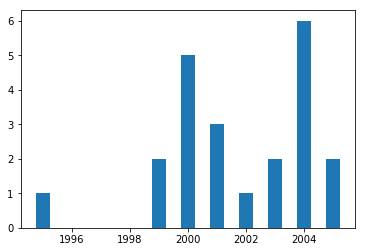

In [24]:
#Execute the query search
query = input()
results = querysearch(query)
print("Here is a timeline of all results: ")
makeTimeline(results)

In [25]:
import os
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

def makeWordweb(hit):
    text = ""
    for category in hit["_source"]:
        text += hit["_source"][category]    
    stopwords = set(STOPWORDS)
    stopwords.update(["de", "het", "een", "vraag", "betreft", "van", "antwoord", "en", "op", "door", "item"])
    wordcloud = WordCloud(width=480, height=480, background_color="white", stopwords=stopwords).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()

kritiek
Got 22 Hits:
Here are the first 10
Vraag 1: Wat is uw reactie op de kritiek van de Inspectie voor de Gezondheidszorg op de Stichting Code Geneesmiddelenreclame (CGR)? 

http://www.geencommentaar.nl/parlando/index.php?action=doc&filename=KVR20845

Vraag 2: Bent u bekend met het feit dat geschiedenisdocenten aanwezig op de VGN examenvergadering in onder andere de regio Eindhoven ernstige kritiek hebben geuit op het HAVO geschiedenis examen 2000? 

http://www.geencommentaar.nl/parlando/index.php?action=doc&filename=KVR11967

Vraag 3: Hoe beoordeelt u de kritiek van de wetenschapswinkel economie van de rijksuniversiteit Groningen op de systematiek die voorziet in een hogere rijksbijdrage naarmate de eigenaar van een monument zelf meer bijdraagt, gegeven de krappe financiÃ«le positie van veel kerkbesturen? 

http://www.geencommentaar.nl/parlando/index.php?action=doc&filename=KVR10345

Vraag 4: Bent u op de hoogte van het feit dat kritiek op de Turkse bezetting van Noord-Cyprus en er

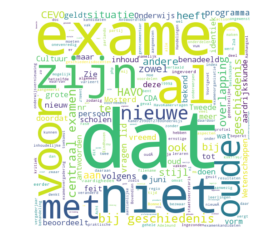

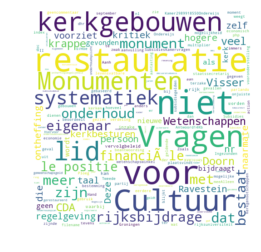

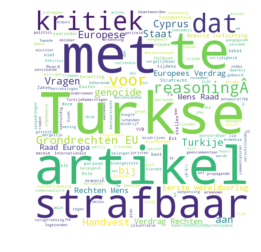

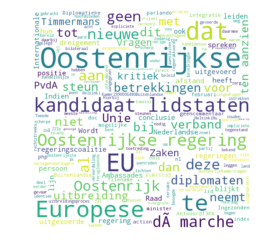

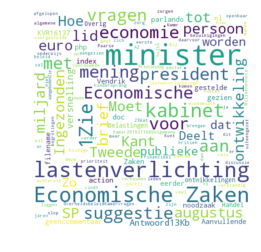

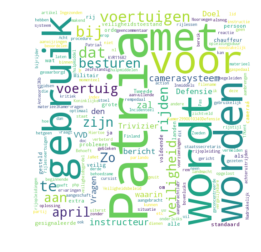

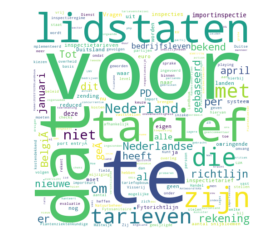

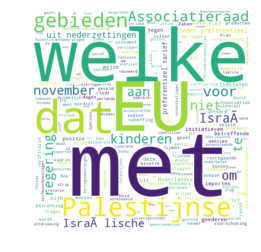

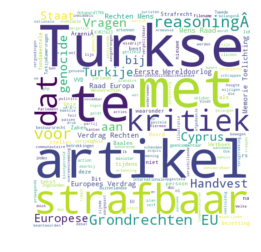

In [26]:
#Execute the query search
query = input()
results = querysearch(query)
print("Here is a wordweb of each results: ")
for hit in range(1, 10):
    makeWordweb(results[hit])

In [ ]:
def advancedSearch(vraag, onderwerp, ministerie):
    res = es.search(index='kamervragen', body = { "query": { "bool": { "must": [ { "term": { "vraag 1": vraag } }, { "term": { "Bibliografische_omschrijving": onderwerp } }, { "term": { "Indiener": ministerie } } ] } } } )
    counter = 1
    print(vraag, onderwerp, ministerie)
    print("Got %d Hits:" % res['hits']['total'])
    print("Here are the first " + str(min(10, res['hits']['total'])))
    for hit in res['hits']['hits']:
        #print(json.dumps(hit, indent=4, sort_keys=True))
        print("Vraag " + str(counter) + ": " + hit["_source"]["vraag 1"])
        print(hit["_source"]["Permalink"])
        counter += 1
        

In [ ]:
# Example from https://www.elastic.co/guide/en/elasticsearch/guide/current/_search_lite.html
# GET /megacorp/employee/_search?q=last_name:Smith
# View the query in sense to see the specific JSON way of writing it

q= {
  "query": {
    "match": {
      "last_name": "smith"
    }
  }
}
res = es.search(index="megacorp", body=q)
res

In [ ]:
# res is a dict
res['hits']['hits']

In [ ]:
# score of first hit 
res['hits']['hits'][0]['_score']

# Bulk indexing

If you index a lot of documents you need to use the bulk index methods.

See 
* <https://www.elastic.co/guide/en/elasticsearch/guide/current/bulk.html> for the explanation in the guide
* <http://unroutable.blogspot.nl/2015/03/quick-example-elasticsearch-bulk-index.html> for the Python way

In [ ]:
>>> import itertools
>>> import string
>>> from elasticsearch import  helpers
 
>>> # k is a generator expression that produces
... # a series of dictionaries containing test data.
... # The test data are just letter permutations
... # created with itertools.permutations.
... #
... # We then reference k as the iterator that's
... # consumed by the elasticsearch.helpers.bulk method.
>>> k = ({'_type':'foo', '_index':'test2','letters':''.join(letters)}
...      for letters in itertools.permutations(string.letters,2))

>>> # calling k.next() shows examples
... # (while consuming the generator, of course)
>>> # each dict contains a doc type, index, and data (at minimum)
>>> k.next()

In [ ]:
# What is this k generator?

letters=  [letters for letters in itertools.permutations(string.letters,4)]

len(letters),letters[:5]

In [ ]:
k.next()

In [ ]:
>>> # create our test index
>>> es.indices.create('test2')

In [ ]:

>>> helpers.bulk(es,k)

In [ ]:
>>> # check to make sure we got what we expected...
>>> es.count(index='test')

# Your turn
* Make quite a bit more documents by changing the 2 in the definition of k to 3, or 4...
* index them again and query, and notice performance
* find out how you can delete an index ;-)